### Build a Simple Workflow or Graph using LangGraph

### State:
- First define the State of the Graph.

- The state schema serves as the input schema for all Nodes and Edges in the graph.

- Let's use the TypedDict class from python's typing module as our schema, which proovides type hints for the keys.


In [1]:
from typing_extensions import TypedDict

# Setting the State (its a shared memory)
class State(TypedDict):
    graph_info:str

#### Nodes are nothing but python functions:

In [2]:
# Nodes
def start_play(state:State):
    print("Start play node has been called")
    return {"graph_info":state["graph_info"] + "I am planning to play"}

def cricket(state:State):
    print("Cricket node has been called")
    return {"graph_ino":state["graph_info"] + "Cricket"}

def basketball(state:State):
    print("Basketball node has been called")
    return {"graph_info":state["graph_info"] + "Basketball"}

In [3]:
import random
from typing import Literal

def random_play(state: State) -> Literal['cricket', 'basketball']:
    if random.random()>0.5:
        return "cricket"
    else:
        return "basketball"


In [4]:
# !pip uninstall langgraph -y
!pip install "langgraph[all]"

In [5]:
!pip install --upgrade pip setuptools


  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)


ERROR: To modify pip, please run the following command:
C:\Users\DELL\Downloads\GitHub\Next-word-LSTM\.conda\python.exe -m pip install --upgrade pip setuptools


In [6]:
!pip uninstall langgraph -y

Found existing installation: langgraph 0.5.1
Uninstalling langgraph-0.5.1:
  Successfully uninstalled langgraph-0.5.1


In [7]:
!pip install "langgraph[all]"

  Using cached langgraph-0.5.1-py3-none-any.whl.metadata (6.7 kB)
Using cached langgraph-0.5.1-py3-none-any.whl (143 kB)


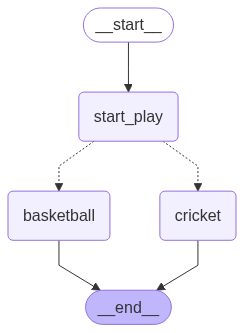

In [12]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build the Graph
graph = StateGraph(State)

# Add all the nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("basketball", basketball)

# Schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket", END)
graph.add_edge("basketball", END)

# Compile the graph:
graph_builder = graph.compile()

# View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
graph_builder.invoke({"graph_info":"I am Shiva Prasad Naroju, "})

Start play node has been called
Cricket node has been called


{'graph_info': 'I am Shiva Prasad Naroju, I am planning to play'}